In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split # for splitting the data into training and testing sets
from sklearn.linear_model import LinearRegression # models we are going to use
from sklearn.metrics import accuracy_score, r2_score, mean_squared_error, mean_absolute_error # for comparing the predicted and test values
from sklearn.model_selection import train_test_split # for splitting the data into training and testing sets
from sklearn.neighbors import KNeighborsRegressor  # models we are going to use
from sklearn.model_selection import cross_validate, RepeatedKFold
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score # for comparing the predicted and test values
import seaborn as sns
import random
from operator import itemgetter

plt.style.use('seaborn')

## Data Cleaning

In [2]:
R_train = pd.read_csv('Rossmann_train.csv')
R_train.count()

C:\Users\Bat56\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


Store            1017209
DayOfWeek        1017209
Date             1017209
Sales            1017209
Customers        1017209
Open             1017209
Promo            1017209
StateHoliday     1017209
SchoolHoliday    1017209
dtype: int64

In [3]:
# top 20% of Stores:
R_train = pd.read_csv('Rossmann_train.csv')

i = 1
lst = []
while i != 1116:
    lst.append([i, R_train[R_train['Store'] == i]['Sales'].mean()])
    i += 1

lst = sorted(lst, key=itemgetter(1), reverse = True)
lst = lst[0:223]

lst = [i[0] for i in lst]


In [4]:
twenty = R_train['Store'].isin(lst)
R_train = R_train[twenty]
R_train

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
3,4,5,2015-07-31,13995,1498,1,1,0,1
6,7,5,2015-07-31,15344,1414,1,1,0,1
23,24,5,2015-07-31,14190,1082,1,1,0,1
24,25,5,2015-07-31,14180,1586,1,1,0,1
26,27,5,2015-07-31,13213,1263,1,1,0,1
...,...,...,...,...,...,...,...,...,...
1017190,1097,2,2013-01-01,5961,1405,1,0,a,1
1017192,1099,2,2013-01-01,0,0,0,0,a,1
1017194,1101,2,2013-01-01,0,0,0,0,a,1
1017205,1112,2,2013-01-01,0,0,0,0,a,1


In [5]:
R_train.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
count,205466.000000,205466.000000,205466.000000,205466.000000,205466.000000,205466.000000,205466.000000
mean,576.187603,3.998194,8805.227205,1009.707699,0.840115,0.381718,0.180458
std,307.758776,1.997380,5105.042705,690.499625,0.366501,0.485809,0.384569
min,4.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,342.000000,2.000000,6808.000000,682.000000,1.000000,0.000000,0.000000
50%,560.000000,4.000000,9080.000000,970.000000,1.000000,0.000000,0.000000
75%,827.000000,6.000000,11556.000000,1300.000000,1.000000,1.000000,0.000000
max,1114.000000,7.000000,41551.000000,7388.000000,1.000000,1.000000,1.000000


In [6]:

R_train['Date'] = pd.to_datetime(R_train['Date'])


In [7]:
R_train.dtypes

Store                     int64
DayOfWeek                 int64
Date             datetime64[ns]
Sales                     int64
Customers                 int64
Open                      int64
Promo                     int64
StateHoliday             object
SchoolHoliday             int64
dtype: object

In [8]:
#Sort by ascending date
R_train = R_train.sort_values(by='Date', ascending = True)
R_train

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
1017207,1114,2,2013-01-01,0,0,0,0,a,1
1016525,431,2,2013-01-01,0,0,0,0,a,1
1016524,430,2,2013-01-01,0,0,0,0,a,1
1016517,423,2,2013-01-01,9643,1751,1,0,a,1
1016515,421,2,2013-01-01,0,0,0,0,a,1
...,...,...,...,...,...,...,...,...,...
725,726,5,2015-07-31,13962,1192,1,1,0,1
721,722,5,2015-07-31,9349,1396,1,1,0,1
712,713,5,2015-07-31,12233,1306,1,1,0,1
559,560,5,2015-07-31,18197,1922,1,1,0,1


In [9]:
#Checking for any NA values
R_train.isna().sum()

Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

In [10]:
#Checking the number of stores that were closed

R_train.query("Open == 0").count()/R_train.count()['Open']

Store            0.159885
DayOfWeek        0.159885
Date             0.159885
Sales            0.159885
Customers        0.159885
Open             0.159885
Promo            0.159885
StateHoliday     0.159885
SchoolHoliday    0.159885
dtype: float64

I would also like to check whether the one-hot encode values on my dataset for qualitative data like Promo and SchoolHolidays are integers instead of string.

In [11]:
R_train[['Promo','SchoolHoliday']].dtypes

Promo            int64
SchoolHoliday    int64
dtype: object

We can see that all of them are integers.

We can also graph the data and check if there are any outliers.

<AxesSubplot:xlabel='Sales', ylabel='Count'>

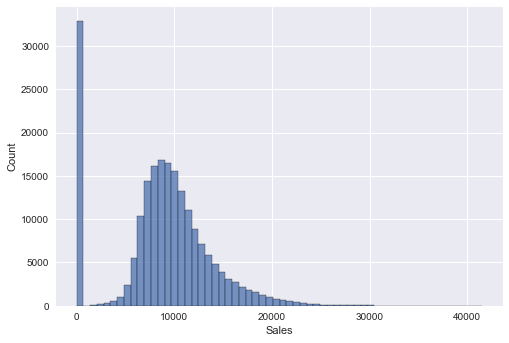

In [12]:
#Histogram of sales
sns.histplot(data=R_train, x ="Sales", bins = 60)

<AxesSubplot:xlabel='Customers', ylabel='Count'>

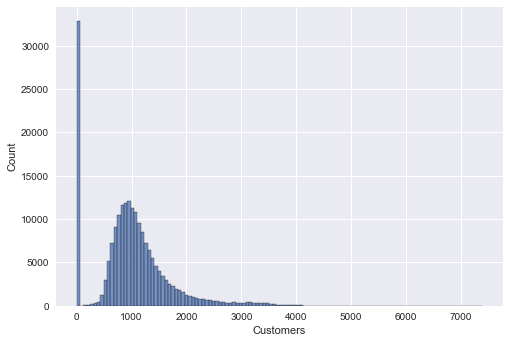

In [13]:
#Histogram of customers
sns.histplot(data=R_train, x="Customers", bins = 120)

We see that there are outliers where the stores were closed. Apart from when the amount of customers is 0 (clearly when the store is closed).

<AxesSubplot:xlabel='Promo', ylabel='Count'>

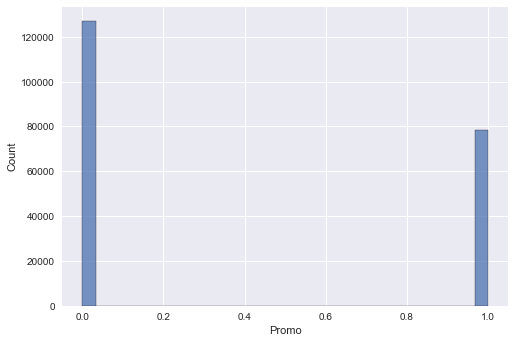

In [14]:
#Histogram of store
sns.histplot(data=R_train, x="Promo")

### Descriptive Statistics

In [15]:
#Descriptive Statistics for all top 20% of stores in terms of sales
R_train["Sales"].describe()

count    205466.000000
mean       8805.227205
std        5105.042705
min           0.000000
25%        6808.000000
50%        9080.000000
75%       11556.000000
max       41551.000000
Name: Sales, dtype: float64

C:\Users\Bat56\anaconda3\lib\site-packages\pandas\core\indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value


[Text(0, 0.5, 'Number of Customers')]

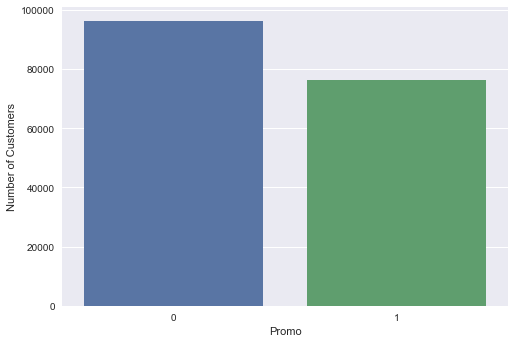

In [16]:
#Descriptive Statistics of stores with and without promo codes
R_train_withoutclose = R_train[R_train['Open'] != 0]
R_train_promo = R_train_withoutclose[['Sales','Promo']].groupby("Promo").describe()
R_train_promo

promo = R_train_promo['Sales']
promo.loc[:, 'Promo'] = ['0', '1']
#Barplot
ax = sns.barplot(data = promo, x = promo['Promo'], y = 'count')
ax.set(ylabel = "Number of Customers")

C:\Users\Bat56\anaconda3\lib\site-packages\pandas\core\indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value


[Text(0, 0.5, 'Average Sales')]

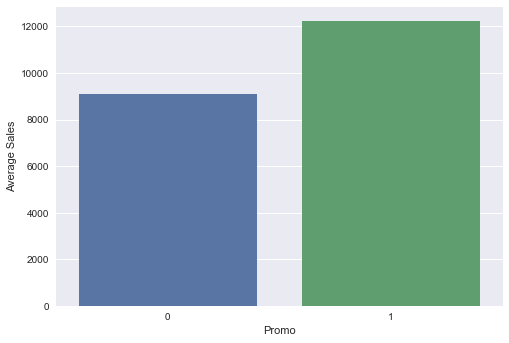

In [17]:
#Sales with and without Promo
R_train_withoutclose = R_train[R_train['Open'] != 0]

#Descriptive Statistics of stores with and without promo codes
R_train_promo = R_train_withoutclose[['Sales','Promo']].groupby("Promo").describe()
R_train_promo


promo = R_train_promo['Sales']
promo.loc[:, 'Promo'] = ['0', '1']
#Barplot
ax = sns.barplot(data = promo, x = promo['Promo'], y = 'mean')
ax.set(ylabel = "Average Sales")

C:\Users\Bat56\anaconda3\lib\site-packages\pandas\core\indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value


[Text(0, 0.5, 'Number of Stores')]

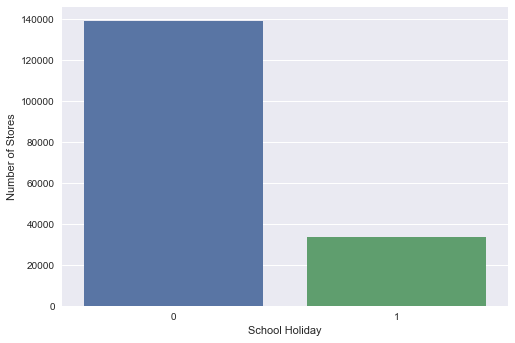

In [18]:
#Descriptive Statistics of stores in school holidays 
R_train_withoutclose = R_train[R_train['Open'] != 0]
R_train_schoolh = R_train_withoutclose[['Sales','SchoolHoliday']].groupby("SchoolHoliday").describe()
schoolh = R_train_schoolh['Sales']

schoolh.loc[:, 'School Holiday'] = ['0', '1']
#Barplot
ax = sns.barplot(data = schoolh, x = schoolh['School Holiday'], y = 'count')
ax.set(ylabel = "Number of Stores")

C:\Users\Bat56\anaconda3\lib\site-packages\pandas\core\indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value


Text(0.5, 1.0, 'Sales, given school holidays')

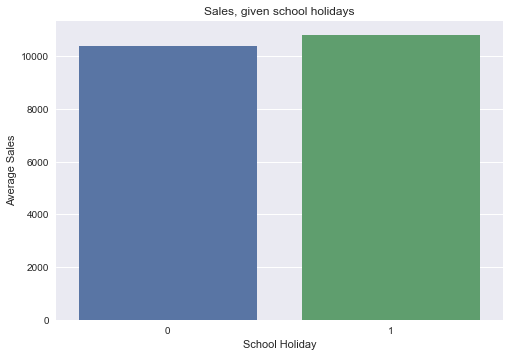

In [19]:
#Average sales for stores in school holidays 
R_train_withoutclose = R_train[R_train['Open'] != 0]
R_train_schoolh = R_train_withoutclose[['Sales','SchoolHoliday']].groupby("SchoolHoliday").describe()

schoolh = R_train_schoolh['Sales']
schoolh.loc[:, 'School Holiday'] = ['0', '1']
#Barplot
ax = sns.barplot(data = schoolh, x = schoolh['School Holiday'], y = 'mean')
ax.set(ylabel = "Average Sales")
plt.title('Sales, given school holidays')

In [20]:
R_train_schoolh 

Sales                                                   \
                  count          mean          std  min     25%      50%   
SchoolHoliday                                                              
0              138990.0  10402.807770  3654.932848  0.0  7917.0   9711.0   
1               33625.0  10804.120773  3706.510233  0.0  8195.0  10016.0   

                                 
                   75%      max  
SchoolHoliday                    
0              12034.0  41551.0  
1              12594.0  38367.0

In [21]:
#Descriptive Statistics of stores in different state holidays 
R_train_stateh = R_train[['Sales','StateHoliday']].groupby("StateHoliday").describe()
R_train_stateh

Sales                                                 \
                 count         mean          std  min     25%     50%   
StateHoliday                                                            
0              26990.0  8673.637607  4639.315007  0.0  6862.0  8870.0   
0             172381.0  9107.551905  4990.029684  0.0  7079.0  9249.0   
a               3915.0   867.073563  3612.328046  0.0     0.0     0.0   
b               1338.0   856.461883  3795.311439  0.0     0.0     0.0   
c                842.0   669.703088  3079.018666  0.0     0.0     0.0   

                                
                  75%      max  
StateHoliday                    
0             11110.5  33913.0  
0             11735.0  41551.0  
a                 0.0  38484.0  
b                 0.0  38722.0  
c                 0.0  32169.0

<AxesSubplot:>

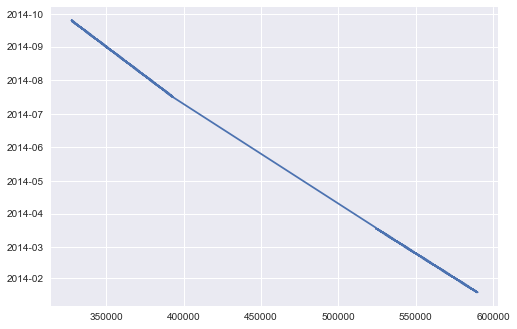

In [22]:
#When do StateHolidays equal 0?
R_train.query('StateHoliday == 0')['Date'].plot.line()

<AxesSubplot:>

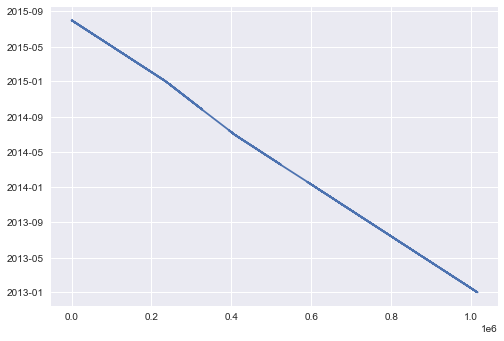

In [23]:
#When do StateHolidays = "0"?
R_train.query('StateHoliday == "0"')['Date'].plot.line()

In [24]:
R_train_time = R_train
R_train_time = R_train[R_train['Sales'] != 0]
R_train_time = R_train_time.set_index(pd.to_datetime(R_train_time["Date"]))



# Delete the column with our old string representation of times.
R_train_time = R_train_time.drop(columns=["Date"])
start = pd.Timestamp("2014-01-01")
end = pd.Timestamp("2014-11-01")

R_train_time_2014 = R_train_time.loc[start:end]
R_train_time_2014[R_train_time_2014['StateHoliday'] == 0]

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
Date,,,,,,,,
2014-01-19,423,7,11713,1882,1,0,0,0
2014-01-19,494,7,7330,1108,1,0,0,0
2014-01-19,335,7,7928,1449,1,0,0,0
2014-01-19,85,7,11008,1450,1,0,0,0
2014-01-19,262,7,25586,3917,1,0,0,0
...,...,...,...,...,...,...,...,...
2014-09-25,753,4,6006,617,1,0,0,0
2014-09-25,738,4,6914,618,1,0,0,0
2014-09-25,733,4,13801,3392,1,0,0,0


In [25]:
R_train['StateHoliday'] = R_train['StateHoliday'].replace(0, '0')

In [26]:
#New Descriptive Statistics of days on different state holidays 
R_train_stateh = R_train[['Sales','StateHoliday']].groupby("StateHoliday").describe()
R_train_stateh



Sales                                                 \
                 count         mean          std  min     25%     50%   
StateHoliday                                                            
0             199371.0  9048.810429  4946.224796  0.0  7044.0  9195.0   
a               3915.0   867.073563  3612.328046  0.0     0.0     0.0   
b               1338.0   856.461883  3795.311439  0.0     0.0     0.0   
c                842.0   669.703088  3079.018666  0.0     0.0     0.0   

                                
                  75%      max  
StateHoliday                    
0             11645.0  41551.0  
a                 0.0  38484.0  
b                 0.0  38722.0  
c                 0.0  32169.0

C:\Users\Bat56\anaconda3\lib\site-packages\pandas\core\indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value


[Text(0, 0.5, 'Number of Stores')]

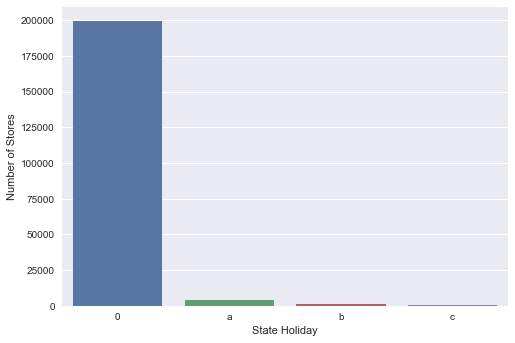

In [27]:
holidays = R_train_stateh['Sales']
holidays.loc[:, 'State Holiday'] = ['0', 'a','b','c']
#Barplot
ax = sns.barplot(data = holidays, x = holidays['State Holiday'], y = 'count')
ax.set(ylabel = "Number of Stores")

C:\Users\Bat56\anaconda3\lib\site-packages\pandas\core\indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value


Text(0.5, 1.0, 'Average Sales for Stores on different State Holidays')

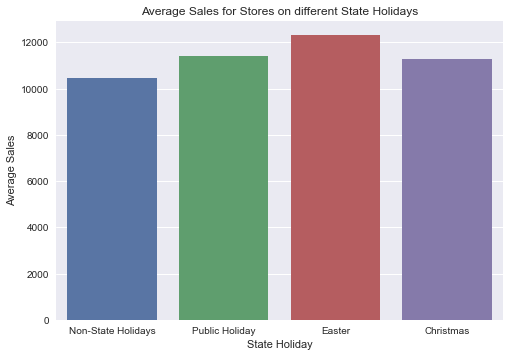

In [28]:
#Average Sales for Stores 
R_train_withoutclose = R_train[R_train['Open'] != 0]
R_train_holidays_c = R_train_withoutclose[['Sales','StateHoliday']].groupby("StateHoliday").describe()


state_h = R_train_holidays_c['Sales']
state_h.loc[:, 'State Holiday'] = ['Non-State Holidays', 'Public Holiday','Easter','Christmas']
#Barplot
ax = sns.barplot(data = state_h, x = state_h['State Holiday'], y = 'mean')
ax.set(ylabel = "Average Sales")
plt.title('Average Sales for Stores on different State Holidays')

In [29]:
R_train_holidays_c

Sales                                                       \
                 count          mean          std     min      25%      50%   
StateHoliday                                                                  
0             172175.0  10478.120424  3654.175420     0.0  7971.00   9767.0   
a                297.0  11429.606061  7170.215744  1028.0  5650.00  10842.0   
b                 93.0  12322.000000  8155.939712  1192.0  6532.00  11559.0   
c                 50.0  11277.800000  6374.662190  3719.0  6208.75  10538.0   

                                 
                   75%      max  
StateHoliday                     
0             12140.00  41551.0  
a             15248.00  38484.0  
b             16252.00  38722.0  
c             13660.25  32169.0

In [30]:
#Descriptive Statistics on days of the week
R_train_withoutclose = R_train[R_train['Open'] != 0]
R_train_withclose = R_train[R_train['Open'] == 0]
R_train_dayofweek = R_train
R_train_dayofweek = R_train_withclose[['Sales','DayOfWeek']].groupby("DayOfWeek").describe()
R_train_dayofweek_c = R_train_withoutclose[['Sales','DayOfWeek']].groupby("DayOfWeek").describe()
R_train_dayofweek_c 


Sales                                                     \
             count          mean          std    min     25%      50%   
DayOfWeek                                                               
1          27902.0  12229.171206  4318.857653  902.0  8817.0  11812.0   
2          29132.0  10671.100268  3605.889888    0.0  8047.0  10130.0   
3          28727.0  10122.951370  3232.710878    0.0  7893.0   9532.0   
4          27374.0  10190.618214  3182.787262    0.0  8068.0   9533.0   
5          28089.0  10565.195272  3107.471069    0.0  8548.0   9905.0   
6          29125.0   9173.265202  3363.370525    0.0  6974.0   8523.0   
7           2266.0  10321.650044  6750.919162  286.0  5140.5   9353.5   

                              
                75%      max  
DayOfWeek                     
1          14568.75  41551.0  
2          12348.25  34692.0  
3          11502.00  33151.0  
4          11446.00  38367.0  
5          11704.00  38722.0  
6          10609.00  31683.0  
7          13745.00  37376.0

C:\Users\Bat56\anaconda3\lib\site-packages\pandas\core\indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value


[Text(0, 0.5, 'Average Sales for Day of the Week')]

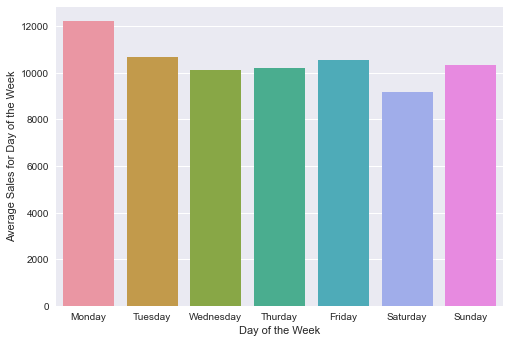

In [31]:
#Mean sales for each day of the week
day_of_week = R_train_dayofweek_c['Sales']
day_of_week.loc[:, 'Day of the Week'] = ['Monday', 'Tuesday','Wednesday','Thurday','Friday','Saturday','Sunday']
#Barplot
ax = sns.barplot(data = day_of_week, x = day_of_week['Day of the Week'], y = 'mean')
ax.set(ylabel = "Average Sales for Day of the Week")

Text(0, 0.5, 'Average Sales')

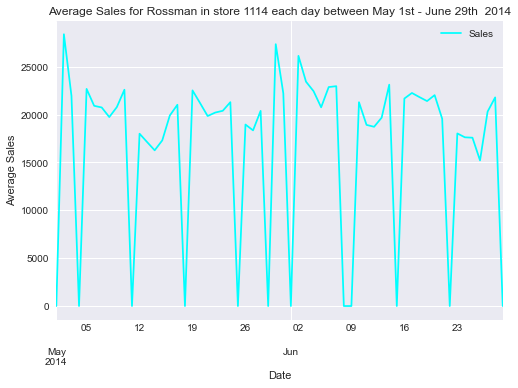

In [32]:
#Average Customers for Rossman in a 4 week period
R_train_time = R_train
R_train_time = R_train.loc[R_train['Store'] == 1114]
R_train_time = R_train_time.set_index(pd.to_datetime(R_train_time["Date"]))



# Delete the column with our old string representation of times.
R_train_time = R_train_time.drop(columns=["Date"])
start = pd.Timestamp("2014-05-01")
end = pd.Timestamp("2014-06-29")

R_train_time_2m  = R_train_time.resample('d').mean().dropna(how='all')
R_train_time_2m = R_train_time_2m.loc[start:end]
R_train_time_2m.plot.line(y = 'Sales', color = "cyan")

plt.legend();
plt.title("Average Sales for Rossman in store 1114 each day between May 1st - June 29th  2014")
plt.xlabel("Date")
plt.ylabel("Average Sales")

Text(0, 0.5, 'Average Sales')

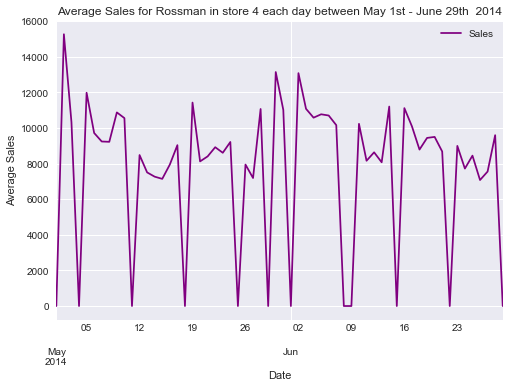

In [33]:
#Average Customers for Rossman in a 4 week period
R_train_time = R_train
R_train_time = R_train.loc[R_train['Store'] == 4]
R_train_time = R_train_time.set_index(pd.to_datetime(R_train_time["Date"]))



# Delete the column with our old string representation of times.
R_train_time = R_train_time.drop(columns=["Date"])
start = pd.Timestamp("2014-05-01")
end = pd.Timestamp("2014-06-29")

R_train_time_2m  = R_train_time.resample('d').mean().dropna(how='all')
R_train_time_2m = R_train_time_2m.loc[start:end]
R_train_time_2m.plot.line(y = 'Sales', color = "purple")

plt.legend();
plt.title("Average Sales for Rossman in store 4 each day between May 1st - June 29th  2014")
plt.xlabel("Date")
plt.ylabel("Average Sales")

Text(0, 0.5, 'Average Sales')

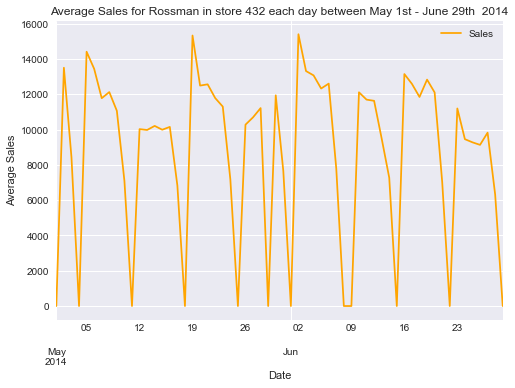

In [34]:
#Average Customers for Rossman in a 4 week period
R_train_time = R_train
R_train_time = R_train.loc[R_train['Store'] == 432]
R_train_time = R_train_time.set_index(pd.to_datetime(R_train_time["Date"]))



# Delete the column with our old string representation of times.
R_train_time = R_train_time.drop(columns=["Date"])
start = pd.Timestamp("2014-05-01")
end = pd.Timestamp("2014-06-29")

R_train_time_2m  = R_train_time.resample('d').mean().dropna(how='all')
R_train_time_2m = R_train_time_2m.loc[start:end]
R_train_time_2m.plot.line(y = 'Sales', color = "orange")

plt.legend();
plt.title("Average Sales for Rossman in store 432 each day between May 1st - June 29th  2014")
plt.xlabel("Date")
plt.ylabel("Average Sales")

Text(0, 0.5, 'Average Sales')

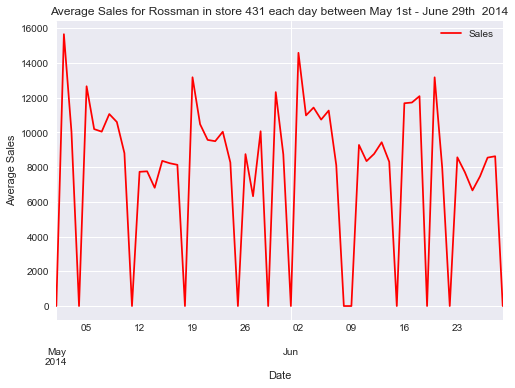

In [35]:
#Average Customers for Rossman in a 4 week period
R_train_time = R_train
R_train_time = R_train.loc[R_train['Store'] == 431]
R_train_time = R_train_time.set_index(pd.to_datetime(R_train_time["Date"]))



# Delete the column with our old string representation of times.
R_train_time = R_train_time.drop(columns=["Date"])
start = pd.Timestamp("2014-05-01")
end = pd.Timestamp("2014-06-29")

R_train_time_2m  = R_train_time.resample('d').mean().dropna(how='all')
R_train_time_2m = R_train_time_2m.loc[start:end]
R_train_time_2m.plot.line(y = 'Sales', color = "red")

plt.legend();
plt.title("Average Sales for Rossman in store 431 each day between May 1st - June 29th  2014")
plt.xlabel("Date")
plt.ylabel("Average Sales")

C:\Users\Bat56\anaconda3\lib\site-packages\pandas\core\indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value


[Text(0, 0.5, 'Number of Sales for Day of the Week')]

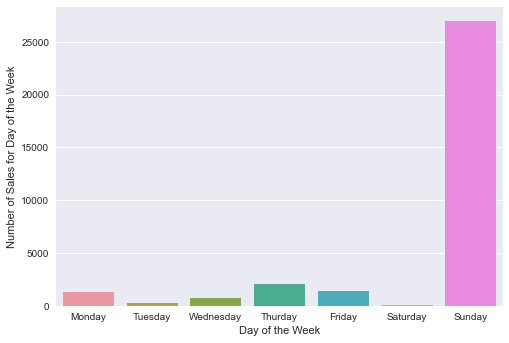

In [36]:
#Number of stores closed on certain days of the week
day_of_week = R_train_dayofweek['Sales']
day_of_week.loc[:, 'Day of the Week'] = ['Monday', 'Tuesday','Wednesday','Thurday','Friday','Saturday','Sunday']
#Barplot
ax = sns.barplot(data = day_of_week, x = day_of_week['Day of the Week'], y = 'count')
ax.set(ylabel = "Number of Sales for Day of the Week")

C:\Users\Bat56\anaconda3\lib\site-packages\pandas\core\indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
C:\Users\Bat56\anaconda3\lib\site-packages\pandas\core\indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


[Text(0, 0.5, 'Number of Stores')]

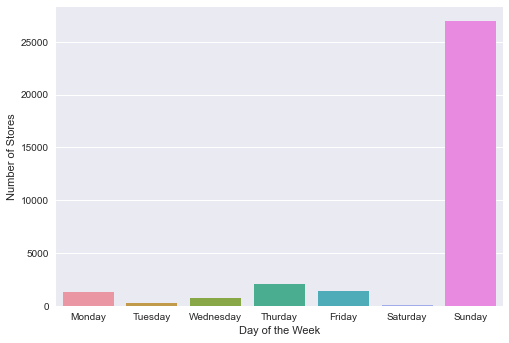

In [37]:
day_of_week_c = R_train_dayofweek['Sales']
day_of_week_c.loc[:, 'Day of the Week'] = ['Monday', 'Tuesday','Wednesday','Thurday','Friday','Saturday','Sunday']

#Number of Stores on Certain Days
day_of_week.loc[:, 'Day of the Week'] = ['Monday', 'Tuesday','Wednesday','Thurday','Friday','Saturday','Sunday']
#Barplot
ax = sns.barplot(data = day_of_week_c, x = day_of_week_c['Day of the Week'], y = 'count')
ax.set(ylabel = "Number of Stores")

Text(0, 0.5, 'Rolling Mean')

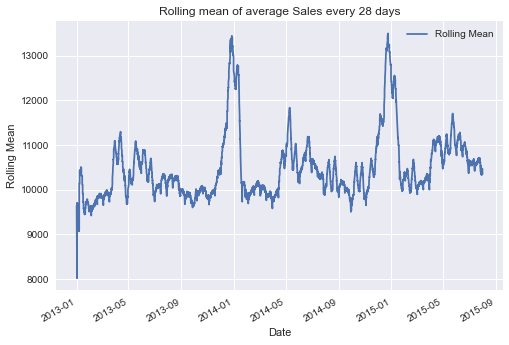

In [38]:
#Time Series of Sales
R_train_time = R_train
R_train_time = R_train[R_train['Sales'] != 0]
R_train_time = R_train_time.set_index(pd.to_datetime(R_train_time["Date"]))



# Delete the column with our old string representation of times.
R_train_time = R_train_time.drop(columns=["Date"])
rolling_mean = R_train_time.rolling('28D').mean()
rolling_mean = rolling_mean[rolling_mean['Sales'] > 8000]

rolling_mean.plot.line( y = 'Sales', label='Rolling Mean')



# Add a legend to show the labels.
plt.legend();
plt.title("Rolling mean of average Sales every 28 days")
plt.xlabel("Date")
plt.ylabel("Rolling Mean")


In [39]:
#standard deviation of rolling mean
((rolling_mean['Sales']).var())**0.5

703.6640635218592

## Predicting Sales Within Four Weeks

### Model 1: The Naive Approach

Text(0, 0.5, 'Average Sales')

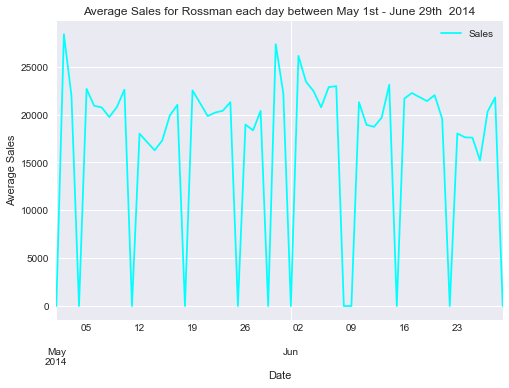

In [40]:
#Average Customers for Rossman in a 4 week period
R_train_time = R_train
R_train_time = R_train.loc[R_train['Store'] == 1114]
R_train_time = R_train_time.set_index(pd.to_datetime(R_train_time["Date"]))



# Delete the column with our old string representation of times.
R_train_time = R_train_time.drop(columns=["Date"])
start = pd.Timestamp("2014-05-01")
end = pd.Timestamp("2014-06-29")

R_train_time_2m  = R_train_time.resample('d').mean().dropna(how='all')
R_train_time_2m = R_train_time_2m.loc[start:end]
R_train_time_2m.plot.line(y = 'Sales', color = "cyan")

plt.legend();
plt.title("Average Sales for Rossman each day between May 1st - June 29th  2014")
plt.xlabel("Date")
plt.ylabel("Average Sales")


In [41]:
#Standard deviation of R_train
(R_train.var())**0.5


C:\Users\Bat56\AppData\Local\Temp/ipykernel_18560/1467245005.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  (R_train.var())**0.5


Store             307.758776
DayOfWeek           1.997380
Sales            5105.042705
Customers         690.499625
Open                0.366501
Promo               0.485809
SchoolHoliday       0.384569
dtype: float64

In [42]:
#Range of error


print(rolling_mean['Sales'].max())
print(rolling_mean['Sales'].min()) 

13494.937093275488
8020.72


Text(0, 0.5, 'Rolling Mean')

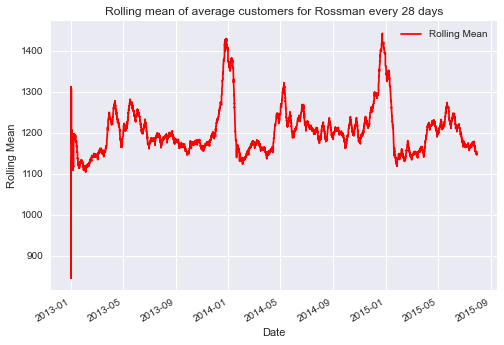

In [43]:
#Time Series of Sales against Customers
R_train_time = R_train
R_train_time = R_train[R_train['Sales'] != 0]
R_train_time = R_train_time.set_index(pd.to_datetime(R_train_time["Date"]))

# Delete the column with our old string representation of times.
R_train_time = R_train_time.drop(columns=["Date"])
rolling_mean = R_train_time.rolling('28D').mean()
rolling_mean = rolling_mean[rolling_mean['Customers'] < 1500]
rolling_mean.plot.line(y = 'Customers', label='Rolling Mean', color = 'red')



# Add a legend to show the labels.
plt.legend();
plt.title("Rolling mean of average customers for Rossman every 28 days")
plt.xlabel("Date")
plt.ylabel("Rolling Mean")



<AxesSubplot:xlabel='Date'>

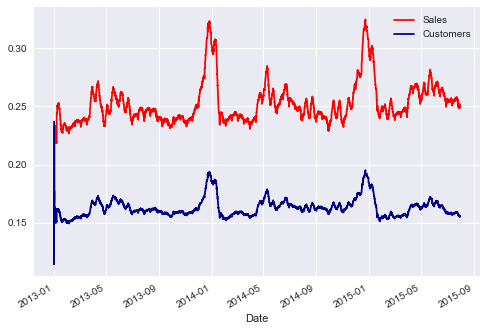

In [44]:
#Combining time series for customers and Sales together
R_train_time[['Sales', 'Customers']] = R_train_time[['Sales', 'Customers']]  / R_train_time[['Sales', 'Customers']].abs().max()

rolling_mean = R_train_time.rolling('28D').mean()
rolling_mean.plot(y = ['Sales', 'Customers'], kind = 'line', color = ['red', 'darkblue'])


### Model 2: Including Prior Knowledge

### Linear Regression

In [45]:
R_train_withoutclose = R_train[R_train['Open'] != 0]

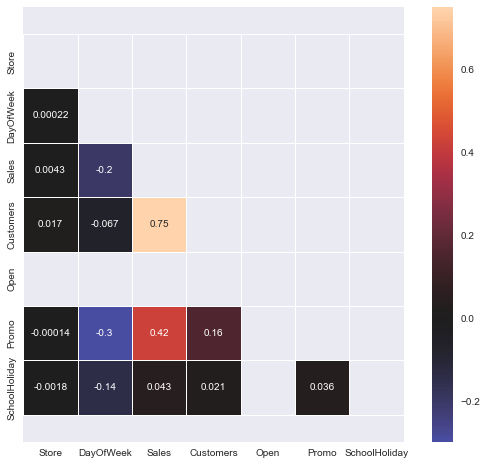

In [46]:
#Linear correlation of variables

corrs = R_train_withoutclose.corr() # calculate the correlation table
# as this is a symmetric table, set up a mask so that we only plot values below the main diagonal
mask = np.triu(np.ones_like(corrs, dtype=bool)) 
f, ax = plt.subplots(figsize=(10, 8)) # initialise the plots and axes
# plot the correlations as a seaborn heatmap, with a colourbar
sns.heatmap(corrs, mask=mask, center=0, annot=True, square=True, linewidths=.5) 
# do some fiddling so that the top and bottom are not obscured
bottom, top = ax.get_ylim() 
ax.set_ylim(bottom + 0.5, top - 0.5);

In [47]:
# substituting nX for X in train_test_split, to use our normalised data.
Y = R_train_withoutclose['Sales']
X = R_train_withoutclose[['Customers']]
Xn = (X-X.mean())/X.std()

# Split into a training set with 80% of the data, and a testing set as the remainder.
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.2,
    random_state=np.random.RandomState(1000)  # Keeps the 'random' split consistent.
) 

# Construct and fit the model
linear = LinearRegression()  # Instantatiate the linear regression model
linear.fit(X_train,Y_train)  # Fit the model parameters to the training data.

# Evaluate model performance.
training_predictions = linear.predict(X_train)  # Get model predictions for both.
testing_predictions = linear.predict(X_test)    # training and testing data.

# Create a table of the various scores.
pd.DataFrame({
    "R^2": {
        "train": r2_score(Y_train, training_predictions),
        "test": r2_score(Y_test, testing_predictions)
    },
    "RMSE": {
        "train": mean_squared_error(Y_train, training_predictions, squared=False),
        "test": mean_squared_error(Y_test, testing_predictions, squared=False),
    },
    "MAE": {
        "train": mean_absolute_error(Y_train, training_predictions),
        "test": mean_absolute_error(Y_test, testing_predictions),
    },
    "R": {
        "train" : (r2_score(Y_train, training_predictions))**0.5,
        "test": (r2_score(Y_test, testing_predictions))**0.5
    }
})

,R^2,RMSE,MAE,R
train,0.561250,2431.993301,1791.147098,0.749166
test,0.569185,2399.588212,1781.825993,0.754444


C:\Users\Bat56\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


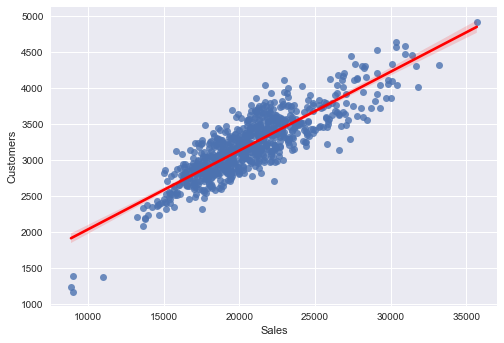

In [48]:
#Visualizing regression line for a particular store


store_1114 = R_train_withoutclose.loc[R_train['Store'] == 1114]

ax = sns.regplot(store_1114['Sales'], store_1114['Customers'], line_kws = {'color': 'red'})



In [49]:
#Changing the values on the DayOfWeek to string and making dummy variables of the discrete data

R_train_withoutclose['DayOfWeek'] = R_train_withoutclose['DayOfWeek'].map(str)
R_train_ds = pd.get_dummies(R_train_withoutclose)
nR_train_ds = R_train_ds.drop(['Store', 'Date'], axis = 1)
nR_train_ds = (nR_train_ds-nR_train_ds.mean())/nR_train_ds.std()
nR_train_ds.describe()



C:\Users\Bat56\AppData\Local\Temp/ipykernel_18560/465978129.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  R_train_withoutclose['DayOfWeek'] = R_train_withoutclose['DayOfWeek'].map(str)


,Sales,Customers,Open,Promo,SchoolHoliday,DayOfWeek_1,DayOfWeek_2,DayOfWeek_3,DayOfWeek_4,DayOfWeek_5,DayOfWeek_6,DayOfWeek_7,StateHoliday_0,StateHoliday_a,StateHoliday_b,StateHoliday_c
count,1.726150e+05,1.726150e+05,0.0,1.726150e+05,1.726150e+05,1.726150e+05,1.726150e+05,1.726150e+05,1.726150e+05,1.726150e+05,1.726150e+05,1.726150e+05,1.726150e+05,1.726150e+05,1.726150e+05,1.726150e+05
mean,-7.240604e-16,2.284172e-16,NaN,-4.278464e-15,2.170678e-14,5.453946e-15,4.850994e-15,2.122017e-15,-6.841956e-15,-3.533140e-15,-5.682304e-16,4.179197e-16,-4.702652e-15,-8.827798e-15,4.835857e-15,1.199335e-14
std,1.000000e+00,1.000000e+00,NaN,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-2.857044e+00,-2.071646e+00,NaN,-8.910323e-01,-4.918562e-01,-4.390992e-01,-4.505922e-01,-4.468190e-01,-4.341335e-01,-4.408531e-01,-4.505271e-01,-1.153344e-01,-1.978142e+01,-4.151563e-02,-2.321763e-02,-1.702187e-02
25%,-6.844767e-01,-6.392620e-01,NaN,-8.910323e-01,-4.918562e-01,-4.390992e-01,-4.505922e-01,-4.468190e-01,-4.341335e-01,-4.408531e-01,-4.505271e-01,-1.153344e-01,5.055220e-02,-4.151563e-02,-2.321763e-02,-1.702187e-02
50%,-1.943542e-01,-2.479850e-01,NaN,-8.910323e-01,-4.918562e-01,-4.390992e-01,-4.505922e-01,-4.468190e-01,-4.341335e-01,-4.408531e-01,-4.505271e-01,-1.153344e-01,5.055220e-02,-4.151563e-02,-2.321763e-02,-1.702187e-02
75%,4.538723e-01,3.139370e-01,NaN,1.122287e+00,-4.918562e-01,-4.390992e-01,-4.505922e-01,-4.468190e-01,-4.341335e-01,-4.408531e-01,-4.505271e-01,-1.153344e-01,5.055220e-02,-4.151563e-02,-2.321763e-02,-1.702187e-02
max,8.469474e+00,1.066296e+01,NaN,1.122287e+00,2.033103e+00,2.277377e+00,2.219289e+00,2.238030e+00,2.303426e+00,2.268316e+00,2.219610e+00,8.670389e+00,5.055220e-02,2.408717e+01,4.307046e+01,5.874760e+01


In [50]:
#Multivariate Linear Regression
Y = R_train_withoutclose['Sales']
X = R_train_ds.drop(['Sales', 'Date', 'Store', 'Open'], axis = 1)
Xn = (X-X.mean())/X.std()

# Split into a training set with 80% of the data, and a testing set as the remainder.
X_train, X_test, Y_train, Y_test = train_test_split(
    Xn, Y, test_size=0.8,
    random_state=np.random.RandomState(100)  # Keeps the 'random' split consistent.
) 

# Construct and fit the model
linear = LinearRegression()  # Instantatiate the linear regression model
linear.fit(X_train,Y_train)  # Fit the model parameters to the training data.

# Evaluate model performance.
training_predictions = linear.predict(X_train)  # Get model predictions for both.
testing_predictions = linear.predict(X_test)    # training and testing data.

# Create a table of the various scores.
pd.DataFrame({
    "R^2": {
        "train": r2_score(Y_train, training_predictions),
        "test": r2_score(Y_test, testing_predictions)
    },
    "RMSE": {
        "train": mean_squared_error(Y_train, training_predictions, squared=False),
        "test": mean_squared_error(Y_test, testing_predictions, squared=False),
    },
    "MAE": {
        "train": mean_absolute_error(Y_train, training_predictions),
        "test": mean_absolute_error(Y_test, testing_predictions),
    },
    "R": {
        "train" : (r2_score(Y_train, training_predictions))**0.5,
        "test": (r2_score(Y_test, testing_predictions))**0.5
    }
    
})

,R^2,RMSE,MAE,R
train,0.680898,2066.874280,1462.953668,0.825165
test,0.675502,2091.079288,1477.983491,0.821889


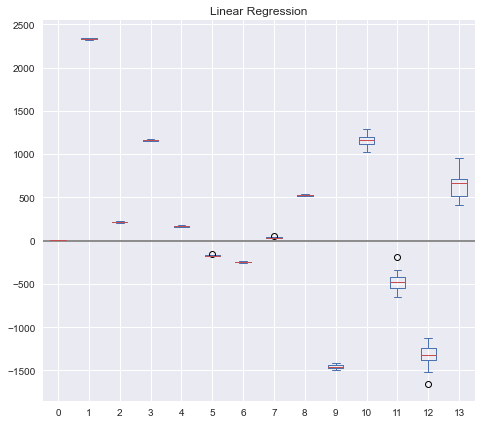

In [51]:
# cross_validate takes the particular model, in this case linear regression which we instantatiated earlier,
# and undertakes a number of runs according the method specified by cv=
# RepeatedKFold splits the data into n sections and repeat the regression modelling 5 times, giving 25 runs
# return_estimator=True returns the fitting data for each run
scores = cross_validate(
    linear, X, Y, cv=RepeatedKFold(n_splits=5, n_repeats=5, random_state=23),
    return_estimator=True
)

# take the results for each simulation (estimator), extract the coefficients for each run 
# and add them to a dataframe with columns being the feature names
coefs = pd.DataFrame([est.coef_ for est in scores['estimator']])
# plot the descriptive statics of the coefficients in a box and whisker plot to show variability
ax = coefs.plot(kind='box',figsize=(10,7))
plt.title('Linear Regression')
plt.axhline(y=0, color='.5')
plt.subplots_adjust(left=.3)

In [52]:
#Linear Regression Model Parameters
feature_names = X.columns
coefs = pd.DataFrame([est.coef_ for est in scores['estimator']], columns = feature_names)
coefs.describe()


,Customers,Promo,SchoolHoliday,DayOfWeek_1,DayOfWeek_2,DayOfWeek_3,DayOfWeek_4,DayOfWeek_5,DayOfWeek_6,DayOfWeek_7,StateHoliday_0,StateHoliday_a,StateHoliday_b,StateHoliday_c
count,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000
mean,4.415308,2335.773460,211.860641,1157.664710,165.602357,-172.994617,-248.920958,35.395815,523.168657,-1459.915962,1160.489942,-473.177300,-1332.569741,645.257100
std,0.006624,5.948986,5.239003,6.986319,5.849833,6.776762,6.351223,7.100590,5.487017,21.892372,66.575565,104.922861,116.077434,143.285754
min,4.400649,2322.256231,201.670890,1146.635794,154.203291,-183.381228,-263.481249,24.595116,512.221026,-1499.164000,1027.240656,-651.027412,-1651.878027,409.603713
25%,4.410990,2332.132336,209.137929,1151.970519,159.602789,-176.836083,-251.837492,31.284135,519.735071,-1476.511865,1114.469420,-549.486563,-1385.115033,516.123383
50%,4.415872,2335.352290,211.324988,1157.108430,166.923097,-174.886494,-247.677399,35.503441,522.923474,-1462.900326,1162.736588,-477.281369,-1326.780192,663.605247
75%,4.420383,2340.591500,215.790554,1161.849716,170.362278,-168.746818,-243.853748,38.610457,525.483490,-1438.281713,1197.859832,-423.673323,-1247.262948,706.601786
max,4.426371,2346.429539,222.754704,1173.605487,175.796514,-155.116608,-238.932334,50.367776,534.046303,-1410.099806,1289.705136,-190.356553,-1128.412040,950.142777


In [53]:
#How many stores have no sales and how many were closed
print(R_train[R_train['Sales'] != 0].count()['Store'])
print(R_train[R_train['Open'] != 0].count()['Store'])

172608
172615


### Random Forests

In [54]:
#Finding training and testing scores for RF
from sklearn.ensemble import RandomForestRegressor

X = R_train_ds.drop(['Sales','Date', 'Open', 'Store'], axis = 1)
y = R_train_withoutclose['Sales']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf = RandomForestRegressor(n_estimators = 300, max_features = 'sqrt', max_depth = 10, random_state = 18).fit(X_train, y_train)

training_score = rf.score(X_train, y_train) # calculate rsq for the training set

# use the independent variables for the testing set to predict the target variable
y_pred = rf.predict(X_test) 
print(r2_score(y_test,y_pred))
print(training_score)




0.7071096322651598
0.7181581238397077


In [55]:
#Finding training and testing scores for RF without customers
from sklearn.ensemble import RandomForestRegressor

X = R_train_ds.drop(['Sales','Date', 'Open', 'Store', 'Customers'], axis = 1)
y = R_train_withoutclose['Sales']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf = RandomForestRegressor(n_estimators = 300, max_features = 'sqrt', max_depth = 10, random_state = 18).fit(X_train, y_train)

training_score = rf.score(X_train, y_train) # calculate rsq for the training set

# use the independent variables for the testing set to predict the target variable
y_pred = rf.predict(X_test) 
print(r2_score(y_test,y_pred))
print(training_score)

0.2315880800498782
0.23997378146765425


C:\Users\Bat56\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


array([4.27479643e-04, 1.91855730e-03, 3.09689357e-03, 3.58735450e-03,
       4.58353159e-03, 1.27975118e-02, 1.49513727e-02, 1.74098745e-02,
       1.91359218e-02, 1.96022618e-02, 3.75994065e-02, 1.38080825e-01,
       7.26809009e-01])

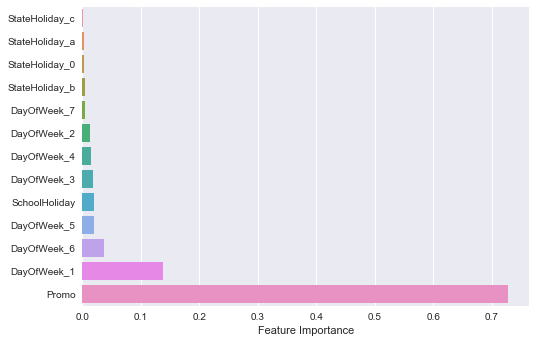

In [56]:
#Sorting the importance of feature variables
sort = rf.feature_importances_.argsort()  
sns.barplot(rf.feature_importances_[sort], X.columns[sort])
plt.xlabel("Feature Importance")
rf.feature_importances_[sort]

In [57]:
#Corrolating with the top 2 important features

X = R_train_ds[['Customers','Promo', 'DayOfWeek_1']]
y = R_train_withoutclose['Sales']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf = RandomForestRegressor(n_estimators = 300, max_features = 'sqrt', max_depth = 10, random_state = 18).fit(X_train, y_train)

training_score = rf.score(X_train, y_train) # calculate rsq for the training set

# use the independent variables for the testing set to predict the target variable
y_pred = rf.predict(X_test) 
print(r2_score(y_test,y_pred))
print(training_score)

0.6950647482239852
0.7086280528227706


C:\Users\Bat56\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'actual test values')

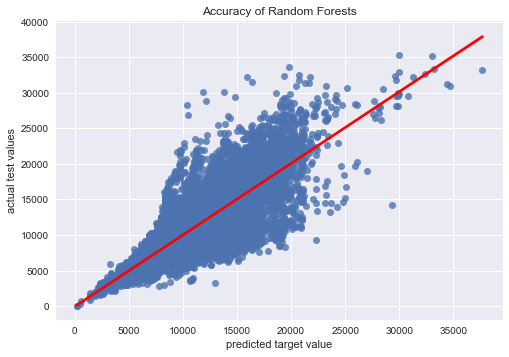

In [58]:
#Scatterplot visualizing accuracy
ax = sns.regplot(y_pred, y_test, line_kws = {'color': 'red'})
plt.title("Accuracy of Random Forests")
plt.xlabel("predicted target value")
plt.ylabel("actual test values")

### K Nearest Neighbour

Text(0, 0.5, 'Mean Absolute Error')

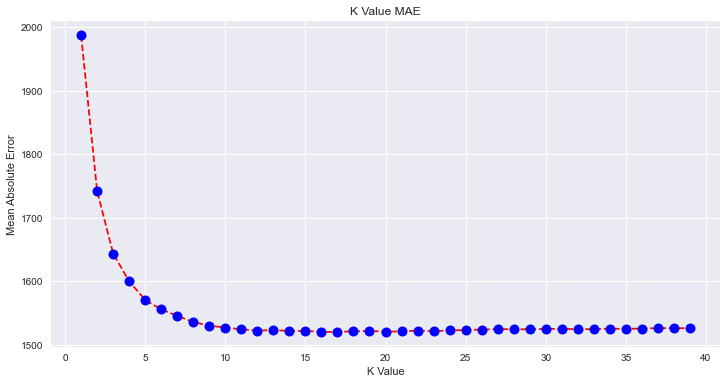

In [59]:
#KNN Regression accuracy plotting

from sklearn.neighbors import KNeighborsRegressor

X = R_train_ds.drop(['Sales','Date', 'Open', 'Store'], axis = 1)
y = R_train_withoutclose['Sales']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

error = []

# Calculating MAE error for K values between 1 and 39
for i in range(1, 40):
    knn = KNeighborsRegressor(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    mae = mean_absolute_error(y_test, pred_i)
    error.append(mae)
    
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', 
         linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
         
plt.title('K Value MAE')
plt.xlabel('K Value')
plt.ylabel('Mean Absolute Error')

In [60]:
#Training and testing score for k-value = 15

neigh = KNeighborsRegressor(n_neighbors=15)
neigh.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(r2_score(y_test,y_pred))
print(training_score)

0.6585513169264249
0.7086280528227706
